In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
portfolio = pd.read_csv("data/Stock_History/closing.csv")
company = pd.read_csv("data/company_data.csv")

In [4]:
portfolio = portfolio.set_index(pd.DatetimeIndex(portfolio['Date'].values))
portfolio = portfolio.drop(['Date'],axis=1)

In [5]:
daily_return = portfolio.pct_change(1)

In [6]:
daily_return = daily_return.dropna()

In [7]:
annual_mean_return = daily_return.mean() * 252
annual_return_var = daily_return.var() * 252
annual_risk = daily_return.std() * math.sqrt(252)
stock_volatility = daily_return.std()

In [8]:
data_finacial = pd.DataFrame()
data_finacial['annual returns'] = annual_mean_return
data_finacial['annual risk'] = annual_risk
data_finacial['stock symbole'] = data_finacial.index
data_finacial['Ratio'] = data_finacial['annual returns'] / data_finacial['annual risk']

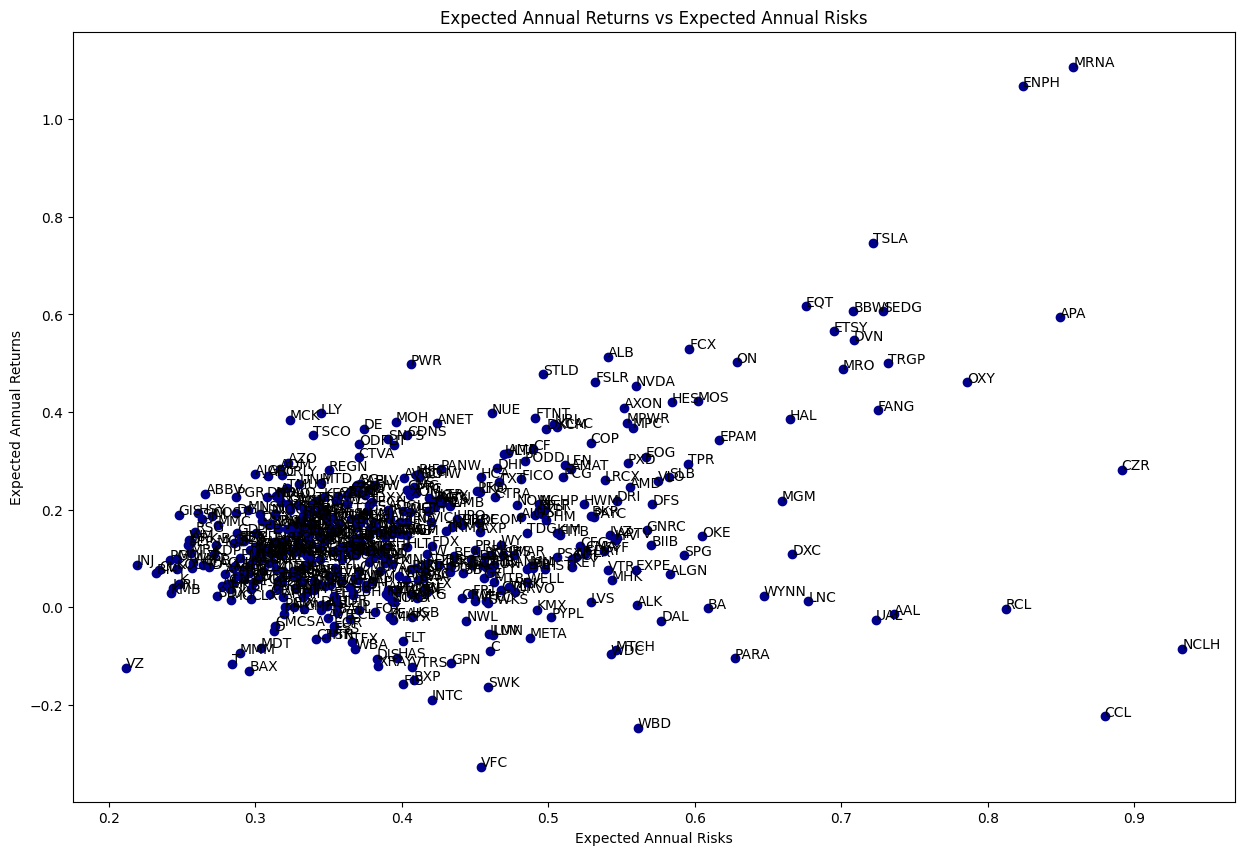

In [9]:
fig, ax = plt.subplots(figsize=(15,10)) 
plt.title('Expected Annual Returns vs Expected Annual Risks') 
ax.scatter(data_finacial[ 'annual risk'] , data_finacial['annual returns'], c = 'DarkBlue') 
ax.set_xlabel('Expected Annual Risks')
ax.set_ylabel('Expected Annual Returns')


for idx, row in data_finacial. iterrows():
    ax.annotate(row['stock symbole'], (row['annual risk'], row['annual returns']), c = 'Black')

plt.show()

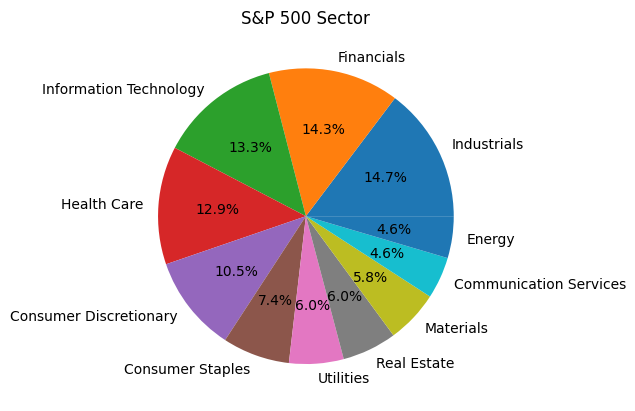

In [28]:
plt.pie(company['GICS Sector'].value_counts(), labels=company['GICS Sector'].value_counts().index, autopct='%1.1f%%')
plt.title('S&P 500 Sector')
plt.show()